##### Copyright 2023 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Quickstart with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/python_quickstart"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.


## Setup


### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:


In [ ]:
!pip install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>


In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`


In [ ]:
import os
os.environ['GOOGLE_API_KEY'] = 'Put your api key here'
genai.configure(api_key = os.environ['GOOGLE_API_KEY'])

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [ ]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

models/gemini-pro
models/gemini-pro-vision


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the `GenerativeModel.generate_content` method:

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 121 ms, sys: 19.8 ms, total: 141 ms
Wall time: 9.65 s


In [ ]:
response

In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [ ]:
to_markdown(response.text)

> The meaning of life is a philosophical question that has been pondered by humanity for centuries. There are many different possible answers to this question, and the answer that is right for one person may not be right for another. Some people believe that the meaning of life is to find happiness, while others believe that it is to make a difference in the world. Still others believe that the meaning of life is to simply experience it and enjoy it. Ultimately, the meaning of life is a personal question that each individual must answer for themselves.
> 
> Here are some of the most common answers to the question "What is the meaning of life?":
> 
> * **To find happiness**. This is a common answer, and it makes sense. After all, we all want to be happy. But what is happiness? And how do we find it? There are many different ways to find happiness, and what works for one person may not work for another. Some people find happiness in their relationships with others, while others find it in their work or hobbies. Still others find happiness in simply being alive and experiencing the world around them.
> * **To make a difference in the world**. This is another common answer, and it is also a noble one. We all want to feel like we are making a difference in the world, and there are many ways to do that. We can volunteer our time to help others, donate to charity, or simply live our lives in a way that is respectful of the environment and others.
> * **To simply experience it and enjoy it**. This is a more hedonistic answer, but it is also valid. Life is short, and we should all try to enjoy it while we can. This doesn't mean that we should be reckless or irresponsible, but it does mean that we should make time for the things that we love and that make us happy.
> 
> The meaning of life is a personal question, and there is no one right answer. The best way to find out what the meaning of life is for you is to explore your own values and beliefs. What do you think is important? What do you want to achieve in your life? Once you have a better understanding of your own values, you can start to make choices that are aligned with those values. And those choices will eventually lead you to a life that is meaningful to you.

If the API failed to return a result, use `GenerateContentRespose.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with `GenerateContentResponse.candidates`:

In [ ]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a philosophical question that has been pondered by humanity for centuries. There are many different possible answers to this question, and the answer that is right for one person may not be right for another. Some people believe that the meaning of life is to find happiness, while others believe that it is to make a difference in the world. Still others believe that the meaning of life is to simply experience it and enjoy it. Ultimately, the meaning of life is a personal question that each individual must answer for themselves.\n\nHere are some of the most common answers to the question \"What is the meaning of life?\":\n\n* **To find happiness**. This is a common answer, and it makes sense. After all, we all want to be happy. But what is happiness? And how do we find it? There are many different ways to find happiness, and what works for one person may not work for another. Some people find happiness in their relationships with ot

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use `GenerativeModel.generate_content(..., stream=True)`.

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 146 ms, sys: 16.9 ms, total: 163 ms
Wall time: 11.2 s


In [ ]:
for chunk in response:
    print(chunk.text)
    print("_"*80)

The meaning of life is a fundamental philosophical question that has been contemplated by humans for
________________________________________________________________________________
 centuries. Different individuals and cultures have proposed various answers to this question, based on their beliefs, values, and experiences. Here are a few commonly discussed meanings of
________________________________________________________________________________
 life:

1. **Happiness and Fulfillment:** Many people believe that the meaning of life lies in achieving happiness and fulfillment. This can involve pursuing personal goals, engaging in activities that bring joy, and fostering meaningful relationships.

2. **Purpose and Contribution:** Some individuals find meaning in life by identifying their unique purpose or
________________________________________________________________________________
 contribution to the world. This may involve making a positive impact on society, pursuing a passion o

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [ ]:
response = model.generate_content("What is the meaning of life?", stream=True)

The `prompt_feedback` attribute works:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

But attributes like `GenerateContentResponse.text` do not:

In [ ]:
try:
    response.text
except Exception as e:
    print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [1]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  405k  100  405k    0     0   198k      0  0:00:02  0:00:02 --:--:--  199k


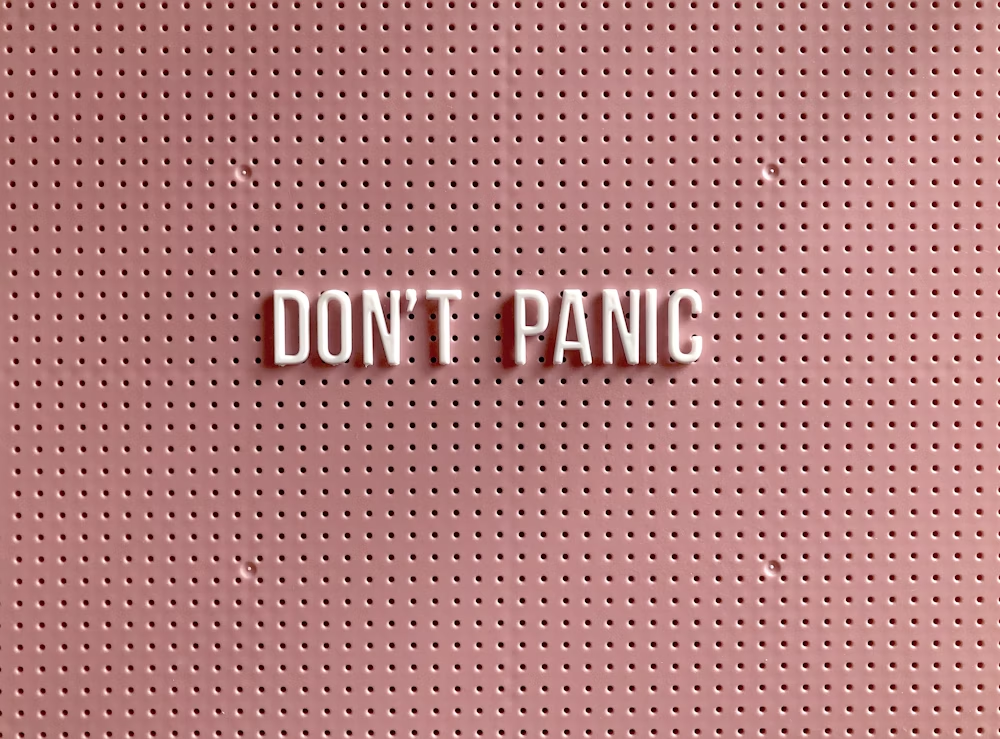

In [ ]:
import PIL.Image

img = PIL.Image.open('image2.png')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  A pink pegboard with white letters spelling out "Don't panic."

To provide both text and images in a prompt, pass a list containing the strings and images:

In [ ]:
response = model.generate_content(["Write a long essay on this", img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

>  There is a saying that goes, “Don’t panic.” It is often used in situations where someone is feeling stressed or overwhelmed. It is a reminder that there is no need to overreact and that things will be okay.
> 
> The phrase “Don’t panic” is often attributed to Douglas Adams, who used it in his book The Hitchhiker’s Guide to the Galaxy. In the book, the phrase is used as a mantra to help the characters stay calm in stressful situations.
> 
> The phrase “Don’t panic” is a reminder that it is important to stay calm and collected in difficult situations. When we panic, we are more likely to make mistakes and cause more problems. By staying calm, we can think more clearly and make better decisions.
> 
> There are many different ways to stay calm in stressful situations. Some people find that it helps to take deep breaths, while others find that it helps to talk to someone about what is going on. It is important to find what works for you and to practice it regularly so that you can stay calm when you need to.
> 
> One of the best ways to stay calm is to be prepared. If you know that you are going to be in a stressful situation, take some time to think about how you will handle it. What can you do to stay calm and collected? Having a plan will help you to feel more confident and in control.
> 
> It is also important to remember that everyone experiences stress differently. What works for one person may not work for another. It is important to find what works for you and to practice it regularly.
> 
> If you are feeling overwhelmed by stress, it is important to seek professional help. A therapist can help you to identify the sources of your stress and develop coping mechanisms.
> 
> Remember, don’t panic. There is always a way to cope with stress. By staying calm and collected, you can make better decisions and find solutions to your problems.
> 
> Here are some additional tips for staying calm in stressful situations:
> 
> * Take deep breaths. When you are feeling stressed, your body goes into “fight or flight” mode. This can cause your heart rate and breathing to increase, and your muscles to tense up. Taking deep breaths can help to slow down your heart rate and breathing, and relax your muscles.
> * Talk to someone. Talking about your problems can help you to feel less alone and overwhelmed. It can also help you to gain perspective on your situation and find solutions to your problems.
> * Exercise. Exercise can help to release endorphins, which have mood-boosting effects. It can also help to improve your sleep, which can make you feel more rested and less stressed.
> * Eat healthy foods. Eating healthy foods can help to improve your overall health and well-being. It can also help to give you more energy, which can make it easier to cope with stress.
> * Get enough sleep. When you are sleep-deprived, you are more likely to feel stressed and overwhelmed. Aim for 7-8 hours of sleep each night.
> * Avoid caffeine and alcohol. Caffeine and alcohol can both worsen stress. If you are feeling stressed, it is best to avoid these substances.
> * Take breaks. If you are feeling overwhelmed, take a few minutes to relax and de-stress. You can do this by taking a walk, reading a book, or listening to music.
> * Learn relaxation techniques. There are many different relaxation techniques that can help you to reduce stress. Some popular techniques include yoga, meditation, and deep breathing exercises.
> * Seek professional help. If you are struggling to cope with stress, it is important to seek professional help. A therapist can help you to identify the sources of your stress and develop coping mechanisms.
> 
> Remember, don’t panic. There is always a way to cope with stress. By staying calm and collected, you can make better decisions and find solutions to your problems.

In [ ]:
response.candidates

[content {
  parts {
    text: " A cricket bat and ball on a green field. The bat is made of wood and the ball is made of leather."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]